In [315]:
# Imports
import pandas as pd
import plotly.express as px
from prettytable import PrettyTable
import plotly.graph_objects as go
import numpy as np
import random
import csv
import os
import json
import altair as alt
from tqdm import tqdm

In [316]:
WD = "/Users/alex/Downloads/SAURA"

In [317]:
"""
1. Whenever comparing BUSTED-MH and BUSTED always include AIC-c so you can decide if MH offers a better fit.
2. Report inferred 2H and 3H rates for BUSTED-MH
3. What happens to the synonymous component of the rate variation parameter set when you add MH
"""

'\n1. Whenever comparing BUSTED-MH and BUSTED always include AIC-c so you can decide if MH offers a better fit.\n2. Report inferred 2H and 3H rates for BUSTED-MH\n3. What happens to the synonymous component of the rate variation parameter set when you add MH\n'

In [318]:
df = pd.read_csv("PLANTS_MODEL_COMPARISON.csv")
df = df.reset_index(drop=True)
df.index += 1

In [319]:
df.columns

Index(['Filename', 'Model', 'N', 'Num.Codons', 'w1', 'p1', 'w2', 'p2', 'w3',
       'p3', 'SRV1', 'SRV_p1', 'SRV2', 'SRV_p2', 'SRV3', 'SRV_p3', 'DH', 'TH',
       'TH_SI', 'cAIC', 'LRT', 'pvalue', 'delta w3', 'delta p3', 'pct.chg. w3',
       'pct.chg. p3', 'delta cAIC (best model)', 'Relative support'],
      dtype='object')

In [320]:
df

,Filename,Model,N,Num.Codons,w1,p1,w2,p2,w3,p3,...,TH_SI,cAIC,LRT,pvalue,delta w3,delta p3,pct.chg. w3,pct.chg. p3,delta cAIC (best model),Relative support
1,accD_hyphy_NT.fas,BUSTEDS,42,646,0.0000,0.0030,0.4016,0.9953,95.4793,0.0017,...,NaN,25105.161743,32.590647,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,accD_hyphy_NT.fas,BUSTEDS-MH,42,646,0.0000,0.3185,0.6049,0.6801,69.7145,0.0014,...,14.488767,25042.708709,16.597254,0.000124,-25.7648,-0.0003,-0.269847,-0.176471,62.453034,2.744707e-14
3,atpA_hyphy_NT.fas,BUSTEDS,42,507,0.0000,0.0987,0.0397,0.8887,1.0000,0.0125,...,NaN,15290.996883,0.000000,0.500000,NaN,NaN,NaN,NaN,2.341049,3.102042e-01
4,atpA_hyphy_NT.fas,BUSTEDS-MH,42,507,0.0000,0.0009,0.0396,0.9950,1.9677,0.0041,...,3.715239,15293.337932,0.106741,0.474014,0.9677,-0.0084,0.967700,-0.672000,NaN,NaN
5,atpB_hyphy_NT.fas,BUSTEDS,42,498,0.0443,0.2207,0.0445,0.7511,1.0000,0.0282,...,NaN,14183.017932,0.000000,0.500000,NaN,NaN,NaN,NaN,2.147322,3.417550e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,ycf1_hyphy_NT.fas,BUSTEDS-MH,38,2208,0.1202,0.4244,1.0000,0.5723,146.3995,0.0034,...,0.714947,133103.162855,93.906779,0.000000,37.0876,-0.0025,0.339282,-0.423729,468.895667,1.515653e-102
127,ycf2_hyphy_NT.fas,BUSTEDS,40,2449,0.0000,0.2157,0.0000,0.5509,3.9430,0.2334,...,NaN,49561.507841,165.644743,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
128,ycf2_hyphy_NT.fas,BUSTEDS-MH,40,2449,0.0000,0.7330,0.9994,0.0000,3.4042,0.2670,...,0.000000,49365.082647,100.130186,0.000000,-0.5388,0.0336,-0.136647,0.143959,196.425194,2.222343e-43
129,ycf3_hyphy_NT.fas,BUSTEDS,42,169,0.0513,0.0000,0.0603,1.0000,1.0023,0.0000,...,NaN,4024.450459,0.000000,0.500000,NaN,NaN,NaN,NaN,6.193852,4.518790e-02


## Plots

In [321]:
dfv = df[df["Filename"] == "accD_hyphy_NT.fas"]
dfv

,Filename,Model,N,Num.Codons,w1,p1,w2,p2,w3,p3,...,TH_SI,cAIC,LRT,pvalue,delta w3,delta p3,pct.chg. w3,pct.chg. p3,delta cAIC (best model),Relative support
1,accD_hyphy_NT.fas,BUSTEDS,42,646,0.0,0.0030,0.4016,0.9953,95.4793,0.0017,...,NaN,25105.161743,32.590647,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,accD_hyphy_NT.fas,BUSTEDS-MH,42,646,0.0,0.3185,0.6049,0.6801,69.7145,0.0014,...,14.488767,25042.708709,16.597254,0.000124,-25.7648,-0.0003,-0.269847,-0.176471,62.453034,2.744707e-14


In [340]:
def get_JSONData(json_file):
    if os.stat(json_file).st_size == 0:
        print('# File is empty:', json_file)
        return 0
    else:
        #print('File is not empty')
        with open(json_file, "r") as in_d:
             json_data = json.load(in_d)
        #end with
        in_d.close()
        return json_data
    #end if
#end method

In [352]:
# ER

filename = dfv["Filename"][1]

print("# Analyzing:", str(filename))
print()

pvalueThreshold = 0.05

DataSets = [["Chloroplast_genes", "BUSTED_default", ".BUSTEDS-MH.json"],
            ["Chloroplast_genes", "BUSTED_default", ".BUSTED.json"],
            ["Mitochondrial_genes", "BUSTED_default", ".BUSTEDS-MH.json"],
            ["Mitochondrial_genes", "BUSTED_default", ".BUSTED.json"]]


df_holder = []

for DataSet in DataSets:
    #DataSet = DataSets[0]
    PATH = os.path.join(WD, DataSet[0], DataSet[1])
    print("# Path:", PATH)
    JSON_FILES = [os.path.join(PATH, file) for file in os.listdir(PATH) if file.endswith(DataSet[2]) and os.path.isfile(os.path.join(PATH, file))]
    
    
    print("# Number of json files", len(JSON_FILES))
    #df_holder = []
    for fn in JSON_FILES:
        if filename in fn:
            print("# Processing:", filename, fn)
            data = get_JSONData(fn)
            ER_data = data["Evidence Ratios"]["constrained"][0]
            
            num_sites = len(ER_data)
            res = [x+1 for x in range(num_sites)]
            data_tuples = list(zip(res, ER_data))
            df = pd.DataFrame(data_tuples, columns=["Site", "ER"])
            df["2ln(ER)"] = 2 * np.log(df["ER"])
            #df["Model"] = "BUSTEDS-MH"
            if ".BUSTEDS-MH.json" in fn:
                df["Model"] = "BUSTEDS-MH"
            if ".BUSTED.json" in fn:
                df["Model"] = "BUSTEDS"
            df_holder.append(df)
        #end if
    #end for
        
    #df_dict = process(JSON_FILES)
    #df = pd.DataFrame.from_dict(df_dict, orient="index")
    #df.index += 1
    #df_holder.append(df)
#end for


df_ER = pd.concat(df_holder)

# Analyzing: accD_hyphy_NT.fas

# Path: /Users/alex/Downloads/SAURA/Chloroplast_genes/BUSTED_default
# Number of json files 65
# Processing: accD_hyphy_NT.fas /Users/alex/Downloads/SAURA/Chloroplast_genes/BUSTED_default/accD_hyphy_NT.fas.BUSTEDS-MH.json
# Path: /Users/alex/Downloads/SAURA/Chloroplast_genes/BUSTED_default
# Number of json files 65
# Processing: accD_hyphy_NT.fas /Users/alex/Downloads/SAURA/Chloroplast_genes/BUSTED_default/accD_hyphy_NT.fas.BUSTED.json
# Path: /Users/alex/Downloads/SAURA/Mitochondrial_genes/BUSTED_default
# Number of json files 32
# Path: /Users/alex/Downloads/SAURA/Mitochondrial_genes/BUSTED_default
# Number of json files 33


In [353]:
df_ER


,Site,ER,2ln(ER),Model
0,1,0.981859,-3.661449e-02,BUSTEDS-MH
1,2,0.982983,-3.432646e-02,BUSTEDS-MH
2,3,0.983772,-3.272300e-02,BUSTEDS-MH
3,4,0.982281,-3.575484e-02,BUSTEDS-MH
4,5,0.983884,-3.249389e-02,BUSTEDS-MH
...,...,...,...,...
641,642,1.000000,3.996803e-15,BUSTEDS
642,643,2.029568,1.415646e+00,BUSTEDS
643,644,1.357699,6.115830e-01,BUSTEDS
644,645,7.148157,3.933709e+00,BUSTEDS


In [369]:
source = df_ER

line1 = alt.Chart(source).mark_line(opacity=0.7).encode(
    x="Site",
    y="2ln(ER)",
    color="Model"
).properties(
    width=400,
    height=50,
    title="A"
)

line1

alt.Chart(...)

In [323]:
sub_dfv = dfv[["DH", "TH", "TH_SI", "Model", "Filename"]]
sub_dfv = sub_dfv[sub_dfv["Model"] == "BUSTEDS-MH"]
sub_dfv = sub_dfv[["DH", "TH", "TH_SI"]]
sub_dfv_T = sub_dfv.T
sub_dfv_T.reset_index(inplace=True)
sub_dfv_T.columns = ["Parameter", "Value"]
sub_dfv_T

## Parameter, Value
# DH, X
# TH, Y
# TH_SI, Z

,Parameter,Value
0,DH,0.000000
1,TH,0.000000
2,TH_SI,14.488767


In [367]:
source = dfv

bars0 = alt.Chart(source).mark_bar().encode(
    x=alt.X('cAIC', stack='zero'),
    y=alt.Y('Model'),
    color=alt.Color('Model')
).properties(
    width=200,
    height=50
)

text0 = alt.Chart(source).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('cAIC', stack='zero'),
    y=alt.Y('Model'),
    detail='Filename',
    text=alt.Text('cAIC', format='.4f')
)


bars = alt.Chart(source).mark_bar().encode(
    x=alt.X('w3', stack='zero'),
    y=alt.Y('Model'),
    color=alt.Color('Model')
).properties(
    width=200,
    height=50
)

text = alt.Chart(source).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('w3', stack='zero'),
    y=alt.Y('Model'),
    detail='Filename',
    text=alt.Text('p3', format='.4f')
)

bars1 = alt.Chart(source).mark_bar().encode(
    x=alt.X('SRV3', stack='zero'),
    y=alt.Y('Model'),
    color=alt.Color('Model')
).properties(
    width=200,
    height=50
)

text1 = alt.Chart(source).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('SRV3', stack='zero'),
    y=alt.Y('Model'),
    detail='Filename',
    text=alt.Text('SRV_p3', format='.4f')
)

bars2 = alt.Chart(source).mark_bar().encode(
    x=alt.X('DH'),
    y=alt.Y('Model')
).properties(
    width=200,
    height=50
)

text2 = alt.Chart(source).mark_text(dx=-15, dy=3, color='white').encode(
    x=alt.X('DH', stack='zero'),
    y=alt.Y('Model'),
    text=alt.Text('DH', format='.4ff')
)



sub_dfv = dfv[["DH", "TH", "TH_SI", "Model", "Filename", "N"]]
sub_dfv = sub_dfv[sub_dfv["Model"] == "BUSTEDS-MH"]
sub_dfv = sub_dfv[["DH", "TH", "TH_SI"]]
sub_dfv_T = sub_dfv.T
sub_dfv_T.reset_index(inplace=True)
sub_dfv_T.columns = ["Parameter", "Rate"]
source = sub_dfv_T
bars3 = alt.Chart(source).mark_point(size=60).encode(
    x=alt.X('Parameter'),
    y=alt.Y('Rate')
).properties(
    width=200,
    height=50
)

#line1 | bars0 + text0 | bars + text | bars1 + text1 | bars3

line1 | bars0 + text0 | bars + text | bars3

alt.HConcatChart(...)

In [325]:
source = df

scm = alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Model'
).properties(
    width=150,
    height=150
).repeat(
    row=['cAIC', 'w3', 'SRV3', 'DH', 'TH'],
    column=['pvalue', 'p3', 'SRV_p3', 'delta w3', 'delta cAIC (best model)']
)

scm

alt.RepeatChart(...)

In [326]:
result = df


#result = result.sort_values(by=["w3"], ascending=True)

line = alt.Chart(result).mark_bar().encode(
    x=alt.X('delta cAIC (best model):Q'),
    y=alt.Y('Filename', sort='ascending'),
    color='Model'
).properties(
    width=600,
    height=800
)

line

alt.Chart(...)

In [327]:
result = result.sort_values(by=["DH"], ascending=False)

line = alt.Chart(result).mark_bar().encode(
    x=alt.X('DH:Q', sort="ascending"),
    y=alt.Y('Filename'),
    color='Model'
).properties(
    width=600,
    height=800
)

line2 = alt.Chart(result).mark_bar().encode(
    x=alt.X('SRV3', sort="ascending"),
    y=alt.Y('Filename'),
    color='Model'
).properties(
    width=600,
    height=800
)

line + line2

alt.LayerChart(...)

In [328]:
result

,Filename,Model,N,Num.Codons,w1,p1,w2,p2,w3,p3,...,TH_SI,cAIC,LRT,pvalue,delta w3,delta p3,pct.chg. w3,pct.chg. p3,delta cAIC (best model),Relative support
66,psbM_hyphy_NT.fas,BUSTEDS-MH,42,34,0.0117,0.4667,0.0403,0.5333,1.1093,0.0000,...,0.0,902.298554,0.000000,0.500000,0.1070,0.0000,0.106754,NaN,NaN,NaN
90,rpl33_hyphy_NT.fas,BUSTEDS-MH,42,73,0.1673,0.0237,0.1880,0.9120,1.0000,0.0643,...,0.0,2923.617572,0.000000,0.500000,-5.9347,0.0480,-0.855798,2.944785,NaN,NaN
74,rbcL_hyphy_NT.fas,BUSTEDS-MH,42,488,0.0413,0.9425,0.4611,0.0503,1.0000,0.0072,...,0.0,13476.848768,0.000000,0.500000,-1.4410,-0.0077,-0.590332,-0.516779,NaN,NaN
56,psbH_hyphy_NT.fas,BUSTEDS-MH,42,81,0.1111,0.8577,0.1177,0.1423,1.0016,0.0000,...,0.0,2463.594388,0.000000,0.500000,-77.7970,-0.0009,-0.987289,-1.000000,NaN,NaN
114,rps19_hyphy_NT.fas,BUSTEDS-MH,42,92,0.0952,0.4003,0.1072,0.5997,1.0016,0.0000,...,0.0,3899.150753,0.000000,0.500000,0.0016,-0.0379,0.001600,-1.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,rps7_hyphy_NT.fas,BUSTEDS,42,155,0.0000,0.1245,0.0000,0.6160,1.0109,0.2595,...,NaN,2220.782001,0.000456,0.499886,NaN,NaN,NaN,NaN,8.211292,0.016479
123,rps8_hyphy_NT.fas,BUSTEDS,42,134,0.0000,0.0646,0.1752,0.9080,3.4059,0.0274,...,NaN,5570.118660,1.036782,0.297739,NaN,NaN,NaN,NaN,7.258560,0.026535
125,ycf1_hyphy_NT.fas,BUSTEDS,38,2208,0.0866,0.4131,1.0000,0.5810,109.3119,0.0059,...,NaN,133572.058521,419.718974,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
127,ycf2_hyphy_NT.fas,BUSTEDS,40,2449,0.0000,0.2157,0.0000,0.5509,3.9430,0.2334,...,NaN,49561.507841,165.644743,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
#mark_boxplot(extent='min-max')
source = result

source = source[source["pvalue"] <= 0.05]
#result = result[result["Model"] == "BUSTEDS-MH"]

#source = result
line1 = alt.Chart(source).mark_line(point=alt.OverlayMarkDef()).encode(
    y='w3',
    x='Model',
    color='Filename',
    tooltip=['Filename', 'Model']
).properties(
    width=300,
    height=400
)

line2a = alt.Chart(source).mark_line().encode(
    y='SRV2',
    x='Model',
    color='Filename'
).properties(
    width=300,
    height=400
)

line2 = alt.Chart(source).mark_line(point=alt.OverlayMarkDef()).encode(
    y='SRV3',
    x='Model',
    color='Filename'
).properties(
    width=300,
    height=400
)

line3 = alt.Chart(source).mark_point().encode(
    y='DH',
    x='Model',
    color='Filename'
).properties(
    width=300,
    height=400
)

#line1 | line2a |  line2 | line3

line1 | line2

alt.HConcatChart(...)

In [330]:
result

,Filename,Model,N,Num.Codons,w1,p1,w2,p2,w3,p3,...,TH_SI,cAIC,LRT,pvalue,delta w3,delta p3,pct.chg. w3,pct.chg. p3,delta cAIC (best model),Relative support
66,psbM_hyphy_NT.fas,BUSTEDS-MH,42,34,0.0117,0.4667,0.0403,0.5333,1.1093,0.0000,...,0.0,902.298554,0.000000,0.500000,0.1070,0.0000,0.106754,NaN,NaN,NaN
90,rpl33_hyphy_NT.fas,BUSTEDS-MH,42,73,0.1673,0.0237,0.1880,0.9120,1.0000,0.0643,...,0.0,2923.617572,0.000000,0.500000,-5.9347,0.0480,-0.855798,2.944785,NaN,NaN
74,rbcL_hyphy_NT.fas,BUSTEDS-MH,42,488,0.0413,0.9425,0.4611,0.0503,1.0000,0.0072,...,0.0,13476.848768,0.000000,0.500000,-1.4410,-0.0077,-0.590332,-0.516779,NaN,NaN
56,psbH_hyphy_NT.fas,BUSTEDS-MH,42,81,0.1111,0.8577,0.1177,0.1423,1.0016,0.0000,...,0.0,2463.594388,0.000000,0.500000,-77.7970,-0.0009,-0.987289,-1.000000,NaN,NaN
114,rps19_hyphy_NT.fas,BUSTEDS-MH,42,92,0.0952,0.4003,0.1072,0.5997,1.0016,0.0000,...,0.0,3899.150753,0.000000,0.500000,0.0016,-0.0379,0.001600,-1.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,rps7_hyphy_NT.fas,BUSTEDS,42,155,0.0000,0.1245,0.0000,0.6160,1.0109,0.2595,...,NaN,2220.782001,0.000456,0.499886,NaN,NaN,NaN,NaN,8.211292,0.016479
123,rps8_hyphy_NT.fas,BUSTEDS,42,134,0.0000,0.0646,0.1752,0.9080,3.4059,0.0274,...,NaN,5570.118660,1.036782,0.297739,NaN,NaN,NaN,NaN,7.258560,0.026535
125,ycf1_hyphy_NT.fas,BUSTEDS,38,2208,0.0866,0.4131,1.0000,0.5810,109.3119,0.0059,...,NaN,133572.058521,419.718974,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
127,ycf2_hyphy_NT.fas,BUSTEDS,40,2449,0.0000,0.2157,0.0000,0.5509,3.9430,0.2334,...,NaN,49561.507841,165.644743,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
source = result

chart1 = alt.Chart(source).mark_bar().encode(
    x='delta w3',
    y='Filename',
    color='delta w3'
).properties(
    width=300,
    height=800
)

# Positive values mean MH had larger w3, negtive ones that base model had higher w3

chart2 = alt.Chart(source).mark_bar().encode(
    x='delta p3',
    y='Filename',
    color='delta p3'
).properties(
    width=300,
    height=800
)

chart1 | chart2

alt.HConcatChart(...)

In [332]:
result

,Filename,Model,N,Num.Codons,w1,p1,w2,p2,w3,p3,...,TH_SI,cAIC,LRT,pvalue,delta w3,delta p3,pct.chg. w3,pct.chg. p3,delta cAIC (best model),Relative support
66,psbM_hyphy_NT.fas,BUSTEDS-MH,42,34,0.0117,0.4667,0.0403,0.5333,1.1093,0.0000,...,0.0,902.298554,0.000000,0.500000,0.1070,0.0000,0.106754,NaN,NaN,NaN
90,rpl33_hyphy_NT.fas,BUSTEDS-MH,42,73,0.1673,0.0237,0.1880,0.9120,1.0000,0.0643,...,0.0,2923.617572,0.000000,0.500000,-5.9347,0.0480,-0.855798,2.944785,NaN,NaN
74,rbcL_hyphy_NT.fas,BUSTEDS-MH,42,488,0.0413,0.9425,0.4611,0.0503,1.0000,0.0072,...,0.0,13476.848768,0.000000,0.500000,-1.4410,-0.0077,-0.590332,-0.516779,NaN,NaN
56,psbH_hyphy_NT.fas,BUSTEDS-MH,42,81,0.1111,0.8577,0.1177,0.1423,1.0016,0.0000,...,0.0,2463.594388,0.000000,0.500000,-77.7970,-0.0009,-0.987289,-1.000000,NaN,NaN
114,rps19_hyphy_NT.fas,BUSTEDS-MH,42,92,0.0952,0.4003,0.1072,0.5997,1.0016,0.0000,...,0.0,3899.150753,0.000000,0.500000,0.0016,-0.0379,0.001600,-1.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,rps7_hyphy_NT.fas,BUSTEDS,42,155,0.0000,0.1245,0.0000,0.6160,1.0109,0.2595,...,NaN,2220.782001,0.000456,0.499886,NaN,NaN,NaN,NaN,8.211292,0.016479
123,rps8_hyphy_NT.fas,BUSTEDS,42,134,0.0000,0.0646,0.1752,0.9080,3.4059,0.0274,...,NaN,5570.118660,1.036782,0.297739,NaN,NaN,NaN,NaN,7.258560,0.026535
125,ycf1_hyphy_NT.fas,BUSTEDS,38,2208,0.0866,0.4131,1.0000,0.5810,109.3119,0.0059,...,NaN,133572.058521,419.718974,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
127,ycf2_hyphy_NT.fas,BUSTEDS,40,2449,0.0000,0.2157,0.0000,0.5509,3.9430,0.2334,...,NaN,49561.507841,165.644743,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


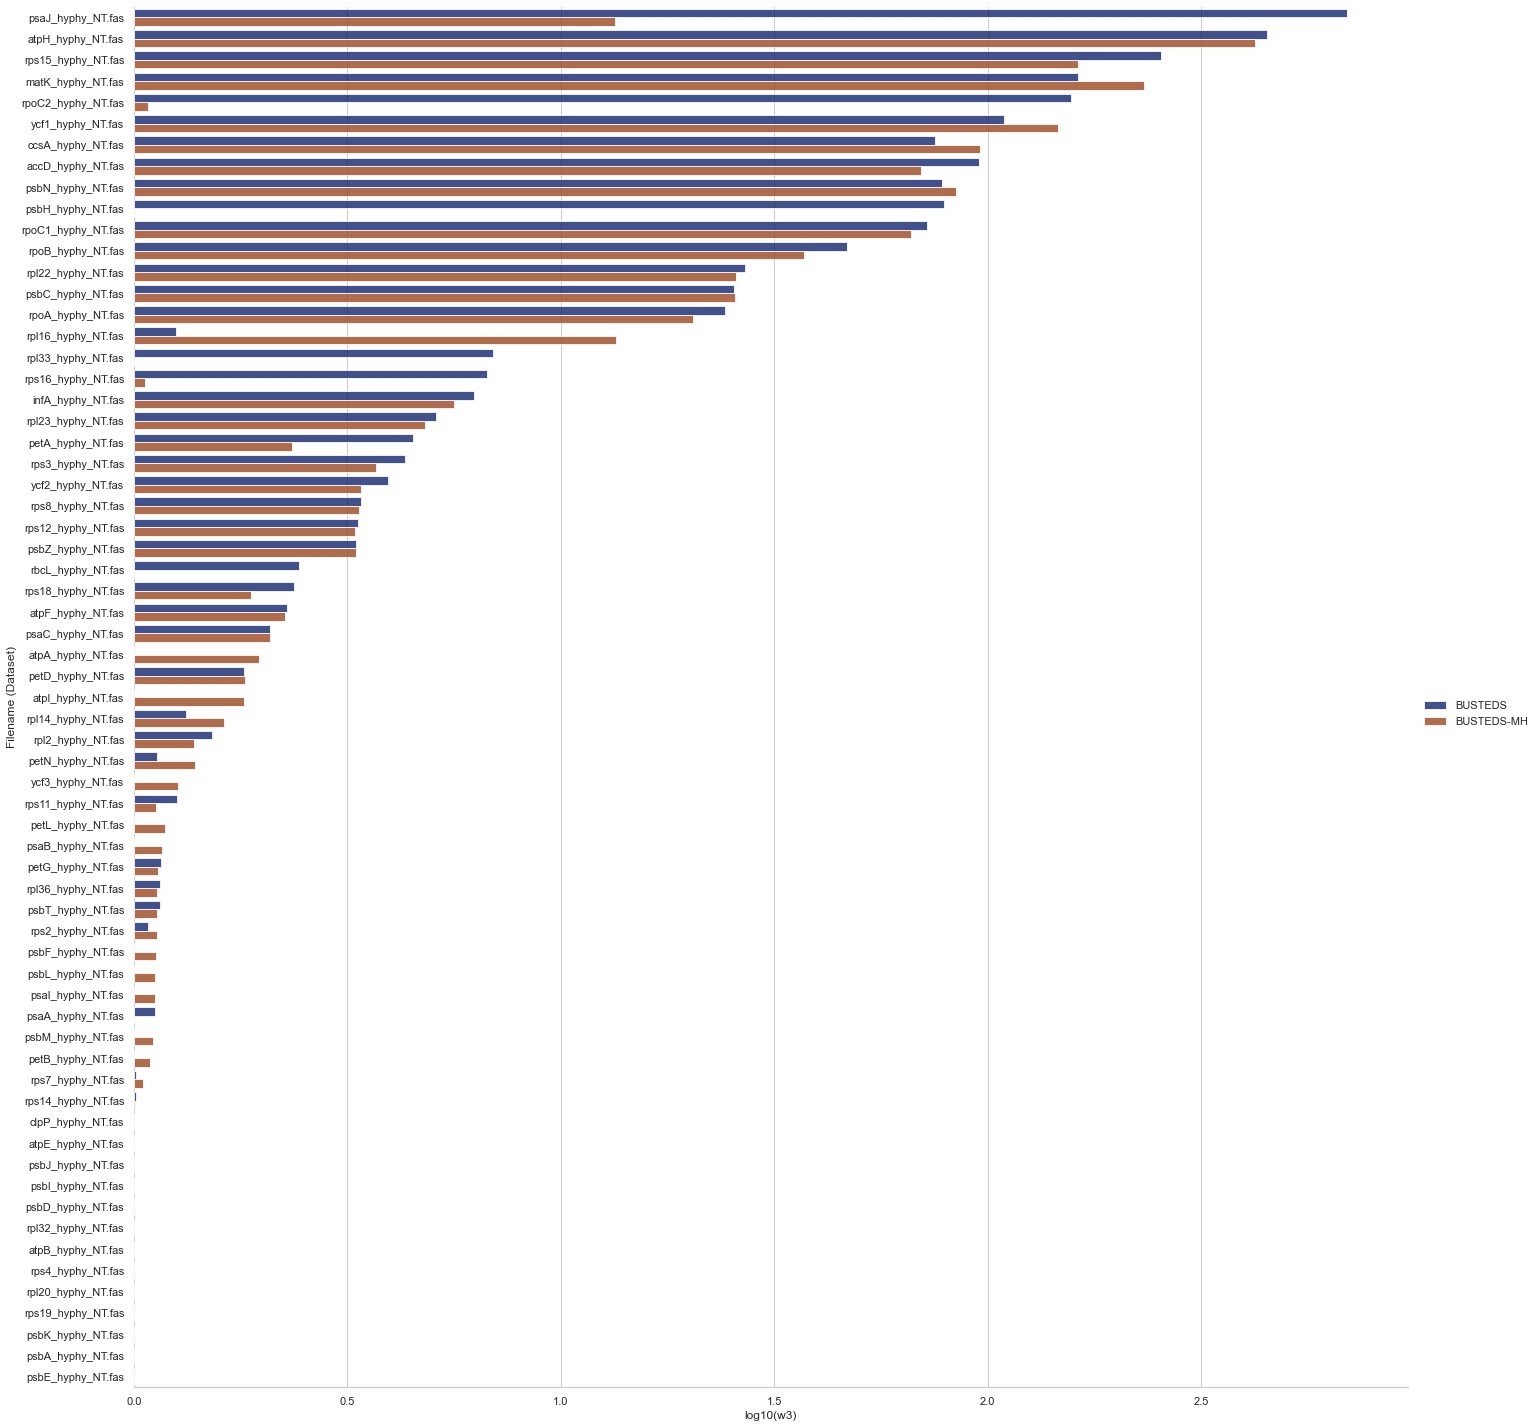

In [333]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np

#source = result[result["w3"] > 0]
source = result
source["log10(w3)"] = np.log10(result["w3"])
source = source.sort_values(by="log10(w3)", ascending=False)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=source, kind="bar",
    x="log10(w3)", y="Filename", hue="Model",
    ci="sd", palette="dark", alpha=.8, height=20
)
g.despine(left=True)
g.set_axis_labels("log10(w3)", "Filename (Dataset)")
g.legend.set_title("")